**Solutions to Selected Problems**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Functions Definitions


def quiver2d(fvector, color='black', ovector=np.array([0, 0])):
    plt.quiver(ovector[0], ovector[1], fvector[0], fvector[1], color = color, units='xy', scale=1)
    plt.annotate(f'{fvector}', (fvector[0], fvector[1]))


def quiver2d_op(vector1, vector2, operation, color='black'):
    if operation == 'sum':
        result = np.array([vector1[0] + vector2[0], vector1[1] + vector2[1]])
        plt.quiver(vector1[0], vector1[1], vector2[0], vector2[1], color = color, units='xy', scale=1)
        plt.quiver(0, 0, result[0], result[1], color = 'grey', units='xy', scale=1, width=0.01, headwidth=1, headlength=0)
        plt.annotate(f'sum={result}', (result[0], result[1]))
    if operation == 'substraction':
        result=np.array([vector1[0] - vector2[0], vector1[1] - vector2[1]])
        plt.quiver(vector1[0], vector1[1], -vector2[0], -vector2[1], color = color, units='xy', scale=1)
        plt.quiver(0, 0, result[0], result[1], color = 'grey', units='xy', scale=1, width=0.01, headwidth=1, headlength=0)
        plt.annotate(f'substraction={result}',(result[0], result[1]))


def format_plot(xlim = (-5, 5), ylim = (-5, 5)):
    ax.grid(True, which='both')
    ax.set_aspect('equal')
    ax.axhline(color='black')  # add horizontal axis line
    ax.axvline(color='black')
    sns.despine(ax=ax, offset=0)
    # the following should be overriden
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])



# Chapter 1

### Problem 1.1

(a) line (b) plane (c) same plane


In [3]:
# TODO: draw 3d plots see mplot3d

### Problem 1.2

In [4]:
v = np.array([4, 1])  # define a vector as a numpy array
w = np.array([-2, 2])
print(v + w)  # solution to 2.1
print(v - w)  # solution to 2.2

[2 3]
[ 6 -1]


(-3, 7)

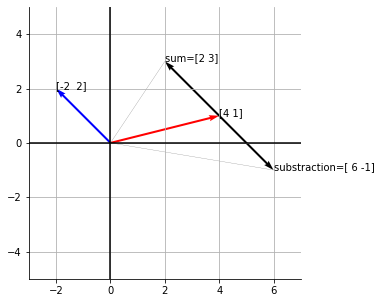

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
quiver2d(v, 'r')
quiver2d(w, 'b')
quiver2d_op(v, w, 'sum')
quiver2d_op(v, w, 'substraction')
format_plot()
plt.xlim(-3, 7)

### Problem 1.3

If `v+w=[3,1]` and `v-w=[1,3]`, compute and draw v and w.

#### Solution

We have a system of 4 equations:w2 =
`(1) v1 + w1 = 3
(2) v1 - w1 = 1
(3) v2 + w2 = 1
(4) v2 - w2 = 3`

The system can be easily solved using arithmetic. 

From (1) and (2): v1=2 w1=1
From (3) and (4): v2=2 w2=1

Solution:
`v = [2,2]`
`w= [1,-1]`

For demostration purposes, we will use [numpy.linalg.solve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html)

In [6]:
help(np.linalg.solve)

Help on function solve in module numpy.linalg:

solve(a, b)
    Solve a linear matrix equation, or system of linear scalar equations.
    
    Computes the "exact" solution, `x`, of the well-determined, i.e., full
    rank, linear matrix equation `ax = b`.
    
    Parameters
    ----------
    a : (..., M, M) array_like
        Coefficient matrix.
    b : {(..., M,), (..., M, K)}, array_like
        Ordinate or "dependent variable" values.
    
    Returns
    -------
    x : {(..., M,), (..., M, K)} ndarray
        Solution to the system a x = b.  Returned shape is identical to `b`.
    
    Raises
    ------
    LinAlgError
        If `a` is singular or not square.
    
    Notes
    -----
    
    .. versionadded:: 1.8.0
    
    Broadcasting rules apply, see the `numpy.linalg` documentation for
    details.
    
    The solutions are computed using LAPACK routine ``_gesv``.
    
    `a` must be square and of full-rank, i.e., all rows (or, equivalently,
    columns) must be linearl

In [7]:
a = np.array([[3, 1], [1, 2]])
b = np.array([9, 8])
x = np.linalg.solve(a, b)
x

array([2., 3.])

In [8]:
# First system to solve
# v1 + w1 = 3
# v1 - w1 = 1

a = np.array([[1, 1], [1, -1]])
b = np.array([3, 1])
x = np.linalg.solve(a, b)
x

array([2., 1.])

In [9]:
# Second system to solve
# v2 + w2 = 1
# v2 - w2 = 3

c = np.array([[1, 1], [1, -1]])
d = np.array([1, 3])
y = np.linalg.solve(c, d)
y

array([ 2., -1.])

In [10]:
# solutions v and w
v = np.array([x[0], y[0]])
w = np.array([x[1], y[1]])
print(f'v = {v}')
print(f'w = {w}')

v = [2. 2.]
w = [ 1. -1.]


(-2, 4)

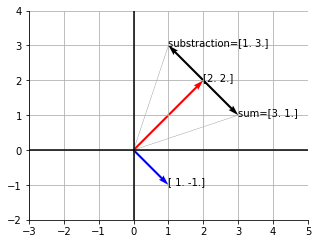

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
quiver2d(v, 'r')
quiver2d(w, 'b')
quiver2d_op(v, w, 'sum')
quiver2d_op(v, w, 'substraction')
format_plot()
plt.xlim(-3, 5)
plt.ylim(-2, 4)

### Problem 1.4

From `v=[2, 1]` and `w=[1, 2]`, find the components of `3v + w` and `v - 3w` and `cv + dw`

In [12]:
v = np.array([2, 1])
w = np.array([1, 2])

In [13]:
# Solution
print(3 * v + w)
print(v - 3 * w)

[7 5]
[-1 -5]


The 3rd part of the problem can be expressed as a vector:
[[2c + d], [c + 2d]]
And as a function that returns a vector, given the inputs `c` and `d`.

In [14]:
def problem_1_4(c: np.array, d: np.array) -> np.array:
    return c * v + d * w

In [15]:
# solution of problem 1.4.1 and 1.4.2 using a function:
print(problem_1_4(3, 1))
print(problem_1_4(1, -3))

[7 5]
[-1 -5]


A more general approach would be to allow other vectors as input:

In [16]:
def problem_1_4_general(c: np.array,
                        d: np.array,
                        v: np.array,
                        w: np.array) -> np.array:
    """ a general implementation of function problem_1_4"""
    return c*v + d*w

In [17]:
# solution of problem 1.4.1 and 1.4.2 using function problem_1_4_general:
print(problem_1_4_general(3, 1, v, w))
print(problem_1_4_general(1, -3, v, w))

[7 5]
[-1 -5]


### Problem 1.5

Compute u+v and u+v+w and 2u+2v+w when 

`u = [1, 2, 3]`  
`v = [-3, 1, -2]`  
`w = [2, -3, 1]`  

In [18]:
# solution
def problem_1_5(a: int, b: int, c: int) -> np.array:
    """ solution to problem 1.5 """
    u = np.array([1, 2, 3])
    v = np.array([-3, 1, -2])
    w = np.array([2, -3, 1])
    return a * u + b * v + c * w

print(problem_1_5(1, 1, 1))
print(problem_1_5(2, 2, 1))

[0 0 2]
[-2  3  3]


In [19]:
# alternative solution
def problem_1_5_vector(vector: np.array) -> np.array:
    """ solution to problem 1.5 using a numpy array as input """
    u = np.array([1, 2, 3])
    v = np.array([-3, 1, -2])
    w = np.array([2, -3, 1])
    return (vector[0] * u + vector[1] * v + vector[2] * w )

print(problem_1_5_vector(np.array([1, 1, 1])))
print(problem_1_5_vector(np.array([2, 2, 1])))

[0 0 2]
[-2  3  3]


In [20]:
# TODO: general solution: define a function that uses a vector and
# a matrix as inputs, and outputs a matrix
# allowing arbitrary compatible dimensions, 
# example (1,3) and (3,3)


### Problem 1.6

Every combination of `v = [1, -2, 1]` and `w = [0, 1, -1]` has components that add to ____.

Find c and d so that `cv + dw = [4, 2, -6]`

** Solution **
This is a system of 3 equations with 2 unknowns, c and d.

`(1) c + 0d = 4`  
`(2) -2c + d = 2`  
`(3) c - d = -6`  

This system might have a solution:

`from (1), (4) c = 4`  
`(4) and (3), 4 - d = -6`  
`- d = -6 - 4`  
`(5) d = 10`  

`from (2) and (4) and (5):`  
`-2c + d = 2`  
`-2 * 4 + 10 = 2`  
`-8 + 10 = 2`  

As we can see, the system has only one solution:  
**c = 4**  
**d = 10**

We can remove one equation from the system. 

In [21]:
# (1) c + 0d = 4`
# (2) -2c + d = 2`

a = np.array([[1, 0], [-2, 1],])
b = np.array([4, 2])
x = np.linalg.solve(a, b)
x

array([ 4., 10.])

### Problem 1.7

In the xy plane, mark all nine of these linear combinations:

$c \begin{bmatrix}3 \\ 1\end{bmatrix} + d \begin{bmatrix}0 \\ 1\end{bmatrix}$

with $c = 0, 1, 2$ and $d = 0, 1, 2$

Text(0.5, 1.0, 'Problem 1.7')

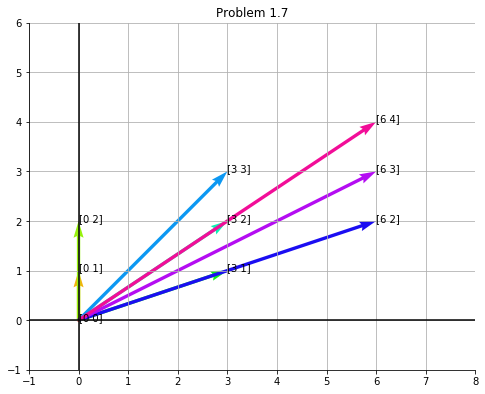

In [111]:
# Solution

# Generate all possible combinations
x = np.array([3, 1])
y = np.array([0, 1])
c = np.array([0, 1, 2])
d = np.array([0, 1, 2])

# Number of possible combinations
# ncombs = c.shape[0] * d.shape[0]

fig, ax = plt.subplots(figsize=(8, 8))


def generate_combs(x=x, y=y, c=c, d=d):
    # color_pallete = sns.color_palette("hls", c.shape[0] * d.shape[0])
    color_pallete = sns.hls_palette(c.shape[0] * d.shape[0], l=.5, s=.9)
    my_iter = iter(range(c.shape[0] * d.shape[0]))
    for i in range(c.shape[0]):
        for j in range(d.shape[0]):
            # print(c[i] * x + d[j] * y)
            color_index = next(my_iter)
            fvector = c[i] * x + d[j] * y
            quiver2d(fvector, color=color_pallete[color_index])


format_plot(xlim=(-1, 8), ylim=(-1, 6))
generate_combs(x, y, c, d)
ax.set_title('Problem 1.7')